In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
import librosa as lb
from librosa import display

In [4]:
# train=np.load("audio_train.npy")
# test=np.load("audio_test.npy")
from google.colab import drive
drive.mount('/content/gdrive')
train=np.load("gdrive/My Drive/audio-classification/audio_train.npy")
test=np.load("gdrive/My Drive/audio-classification/audio_test.npy")

Mounted at /content/gdrive


In [5]:
train.shape

(942, 30000)

In [6]:
type(train)

numpy.ndarray

In [7]:
train

array([[-0.92577249, -0.66291571, -0.26374164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94556701,  1.11562371,  1.10488427, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01025403, -0.01226821, -0.01267925, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00239253,  1.10180998,  1.03759027, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00936416, -0.01141811, -0.01222591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87232733, -0.1913518 ,  0.57717735, ...,  0.        ,
         0.        ,  0.        ]])

In [8]:
#train_labels=pd.read_csv("labels_train.csv",usecols=['label']).to_numpy()
train_labels=pd.read_csv("gdrive/My Drive/audio-classification/labels_train.csv",usecols=['label']).to_numpy()

In [ ]:
train_labels

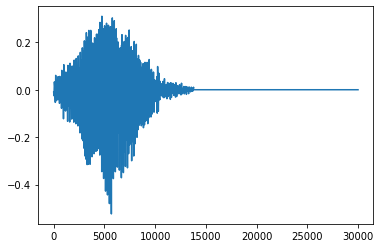

In [10]:
plt.plot(train[2])

In [11]:
# train_Mel_spectograms = []
# for i in range(train.shape[0]):
#     D = np.abs(lb.stft(train[i]))**2
#     S = lb.feature.melspectrogram(S=D)
#     S = lb.feature.melspectrogram(train[i])
#     Xdb = lb.power_to_db(S)
#     #Xdb = lb.amplitude_to_db(abs(spectogram))
#     train_Mel_spectograms.append(Xdb)

train_Mel_spectograms = []
for i in range(train.shape[0]):
    D = np.abs(lb.stft(train[i]))**3
    S = lb.feature.melspectrogram(S=D)
    S = lb.feature.melspectrogram(train[i])
    Xdb = lb.power_to_db(S)
    #Xdb = lb.amplitude_to_db(abs(spectogram))
    train_Mel_spectograms.append(Xdb)

In [12]:
train_Mel_spectograms = np.array(train_Mel_spectograms)

In [13]:
type(train_Mel_spectograms)

numpy.ndarray

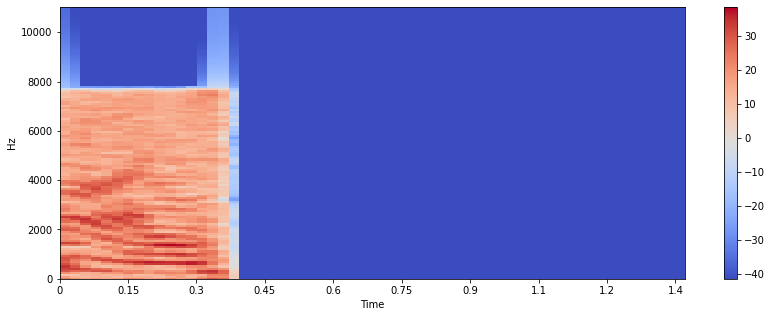

In [14]:
plt.figure(figsize=(14, 5))
lb.display.specshow(train_Mel_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_Mel_spectograms, train_labels, test_size=0.40, random_state=101)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 128, 59)
(377, 128, 59)
(565, 1)
(377, 1)


In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(565, 128, 59, 1)
(377, 128, 59, 1)
(565, 1)
(377, 1)


In [19]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=X_train[0].shape))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2),activation='relu'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 58, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 13, 64)        16448     
Total params: 24,864
Trainable params: 24,864
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 58, 32)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 13, 64)        16448     
_________________________________________________________________
flatten (Flatten)            (None, 24960)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 5s 258ms/step - loss: 4.4443 - accuracy: 0.1451 - val_loss: 2.1115 - val_accuracy: 0.2997
Epoch 2/10
18/18 [==============================] - 4s 248ms/step - loss: 1.9619 - accuracy: 0.3292 - val_loss: 1.7111 - val_accuracy: 0.3873
Epoch 3/10
18/18 [==============================] - 5s 252ms/step - loss: 1.5147 - accuracy: 0.5221 - val_loss: 1.3229 - val_accuracy: 0.6101
Epoch 4/10
18/18 [==============================] - 4s 247ms/step - loss: 1.1608 - accuracy: 0.6566 - val_loss: 0.8662 - val_accuracy: 0.7162
Epoch 5/10
18/18 [==============================] - 4s 249ms/step - loss: 0.6750 - accuracy: 0.7912 - val_loss: 0.5600 - val_accuracy: 0.8170
Epoch 6/10
18/18 [==============================] - 4s 249ms/step - loss: 0.3667 - accuracy: 0.9027 - val_loss: 0.4176 - val_accuracy: 0.8833
Epoch 7/10
18/18 [==============================] - 4s 248ms/step - loss: 0.1977 - accuracy: 0.9540 - val_loss: 0.3334 - val_accuracy: 0.9098
Epoch 

In [24]:
test.shape

(558, 30000)

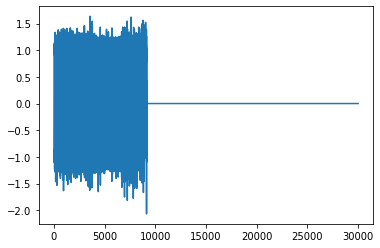

In [25]:
plt.plot(test[0])

In [26]:
# test_Mel_spectograms = []
# for i in range(test.shape[0]):
# #     spectogram = lb.stft(test[i])
# #     Xdb = lb.amplitude_to_db(abs(spectogram))
# #     test_spectograms.append(Xdb)
#     D = np.abs(lb.stft(test[i]))**2
#     S = lb.feature.melspectrogram(S=D)
#     S = lb.feature.melspectrogram(test[i])
#     Xdb = lb.power_to_db(S)
#     #Xdb = lb.amplitude_to_db(abs(spectogram))
#     test_Mel_spectograms.append(Xdb)

test_Mel_spectograms = []
for i in range(test.shape[0]):
#     spectogram = lb.stft(test[i])
#     Xdb = lb.amplitude_to_db(abs(spectogram))
#     test_spectograms.append(Xdb)
    D = np.abs(lb.stft(test[i]))**3
    S = lb.feature.melspectrogram(S=D)
    S = lb.feature.melspectrogram(test[i])
    Xdb = lb.power_to_db(S)
    #Xdb = lb.amplitude_to_db(abs(spectogram))
    test_Mel_spectograms.append(Xdb)

In [27]:
test_Mel_spectograms = np.array(test_Mel_spectograms)

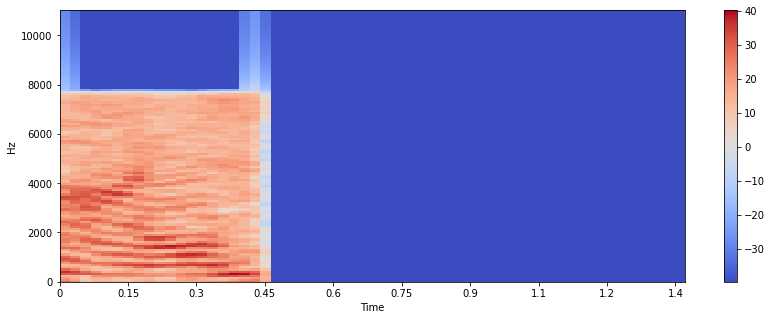

In [28]:
plt.figure(figsize=(14, 5))
lb.display.specshow(test_Mel_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [29]:
test_Mel_spectograms.shape

(558, 128, 59)

In [30]:
test_Mel_spectograms = test_Mel_spectograms.reshape(test_Mel_spectograms.shape[0],test_Mel_spectograms.shape[1],test_Mel_spectograms.shape[2],1)

In [31]:
test_Mel_spectograms.shape

(558, 128, 59, 1)

In [32]:
predictions = model.predict(test_Mel_spectograms)

In [33]:
predictions

array([[  3.0250275 ,   6.3589525 , -15.418235  , ...,  -2.4749532 ,
         -4.50885   ,   2.1447406 ],
       [  4.020598  ,   5.4715805 , -14.121963  , ...,   0.627833  ,
         -7.942316  ,  10.584129  ],
       [ -6.58471   ,   4.768393  , -10.102417  , ...,   1.7061907 ,
         -1.5635494 ,  -3.242645  ],
       ...,
       [  1.8967    ,  -3.316311  , -11.291038  , ...,   2.6086826 ,
         -3.9861019 ,   1.9381863 ],
       [ -1.2705883 ,  -1.8738738 ,  -5.1480246 , ...,   5.9035873 ,
         -1.7841882 ,   0.54609114],
       [  3.7845147 ,   3.732237  , -12.705761  , ...,  -0.96921504,
         -7.8854294 ,   2.541066  ]], dtype=float32)

In [34]:
results = []
for i in range(len(predictions)):
    temp = []
    temp.append(i)
    temp.append(np.argmax(predictions[i]))
    results.append(temp)

In [ ]:
results

In [36]:
results = pd.DataFrame(results,columns=['id','label'])

In [37]:
results

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7


In [38]:
#results.to_csv("Results_2D_CNN_Attempt4.csv",index=False)
from google.colab import files

results.to_csv('Results_25Sept_3.csv', sep=',',  index = False)

files.download('Results_25Sept_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>